# OSSP2 Assignment1
\<Default MDP\> 
- Environment: (4, 4) grid world
- Start: (0, 0)
- Goal: (3, 3)
- Action: 위, 왼쪽, 오른쪽, 아래로 이동
- Policy: random policy
- Gamma: 0.99

## 1. Evaluation and prediction
~~"1-1. On command line tools"은 "1-2. Jupyter"는 같은 프로그램을 수행하는 코드입니다.~~

### ~~1-1. On command line tools~~

In [ ]:
# !python DP.py
# !python MC.py 100
# !python MC.py 1000
# !python MC.py 10000
# !python MC.py 100000
# !python TD.py 1 100
# !python TD.py 1 1000
# !python TD.py 1 10000
# !python TD.py 1 100000
# !python TD.py 3 100
# !python TD.py 3 1000
# !python TD.py 3 10000
# !python TD.py 3 100000

### 1-2. Jupyter implements

In [1]:
from DP import train_DP
from MC import train_MC
from TD import train_TD
from implements.data_handler import read_result

train_DP()
true_vs, _, _ = read_result('DP')

for episode_num in [100, 1000, 10000]:
    train_MC(episode_num=episode_num, true_vs=true_vs)
    train_TD(n_step=1, episode_num=episode_num, true_vs=true_vs)
    train_TD(n_step=3, episode_num=episode_num, true_vs=true_vs)

DP evaluation completed.
MC for 100 episodes prediction completed.
1step-TD for 100 episodes prediction completed.
3step-TD for 100 episodes prediction completed.
MC for 1000 episodes prediction completed.
1step-TD for 1000 episodes prediction completed.
3step-TD for 1000 episodes prediction completed.
MC for 10000 episodes prediction completed.
1step-TD for 10000 episodes prediction completed.
3step-TD for 10000 episodes prediction completed.


## 2. Plot results

In [2]:
from implements.data_handler import read_result, get_gridlike
from matplotlib import pyplot as plt

### 2-1. DP

In [3]:
vs, _, _ = read_result(experiment='DP')
print(get_gridlike(vs))

[[-59.42857143 -57.42857143 -54.28571429 -51.71428571]
 [-57.42857143 -54.57142857 -49.71428571 -45.14285714]
 [-54.28571429 -49.71428571 -40.85714286 -30.        ]
 [-51.71428571 -45.14285714 -30.           0.        ]]


### 2-2. Bias and variance of MC, TD1, TD3 per steps


State value table with MC prediction for 100 episodes
[[-59.7404497  -64.10331597 -59.47671484 -57.03099066]
 [-62.31093027 -59.62109355 -54.41060791 -49.41540907]
 [-57.2405909  -49.22974044 -45.25035584 -28.32160186]
 [-49.98508207 -38.65697204 -29.78757414   0.        ]]

State value table with 1stepTD prediction for 100 episodes
[[-5.31255508 -4.63079503 -4.33874584 -3.68277327]
 [-4.4058551  -4.12259255 -3.7078869  -3.10869006]
 [-3.84409069 -3.41852023 -2.55065814 -1.74079403]
 [-3.5809503  -3.03716509 -1.75652913  0.        ]]

State value table with 3stepTD prediction for 100 episodes
[[-13.03502304 -12.25991602 -11.35843869  -9.63530763]
 [-12.27696229 -11.30770438 -10.43294036  -8.95040199]
 [-10.85433948 -10.0801584   -8.30222127  -5.5070257 ]
 [ -9.001274    -7.79574229  -5.14964394   0.        ]]

State value table with MC prediction for 1000 episodes
[[-63.9029411  -57.61813522 -55.11914518 -59.48738696]
 [-57.03456601 -55.61433396 -49.19206986 -45.64741435]
 [-49.680448

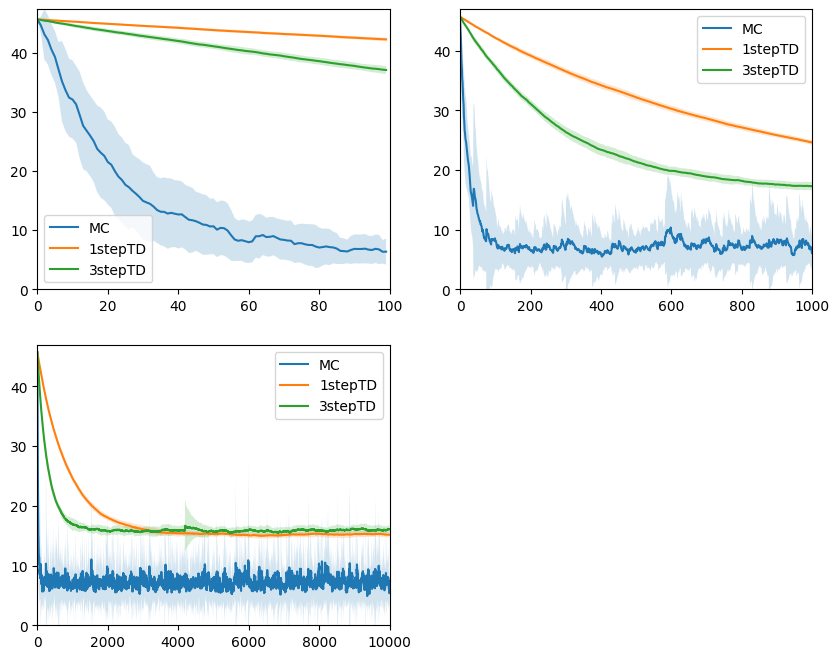

In [5]:
episode_nums = [100, 1000, 10000]
experiments = ['MC', '1stepTD', '3stepTD']

plt.figure(figsize=(10, 8))
for idx, episode_num in enumerate(episode_nums, 1):
    plt.subplot(2, 2, idx)
    y_max = 0
    for experiment in experiments:
        vs, means, std = read_result(experiment=experiment, episode_num=episode_num)
        print(f'\nState value table with {experiment} prediction for {episode_num} episodes')
        print(get_gridlike(vs))
        
        steps = [episode for episode in range(episode_num)]
        means_lower = means - std
        means_upper = means + std

        y_max = max(y_max, max(means_upper))
        plt.axis((0, episode_num, 0, y_max))
        plt.fill_between(steps, means_lower, means_upper, alpha=0.2)
        plt.plot(steps, means, label=experiment)
        plt.legend()
plt.show()